# Άρης Τσιλιφώνης 1115201700170
## Εργασία 2 τεχνητής νοημοσύνης 2(Natural language processing with Deep Learning)

### Import required libraries for the project

In [49]:
!python -m textblob.download_corpora
# For NN models
import torch.nn as nn
import torch
# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
# For large and multi-dimensional arrays
import numpy as np
# For basic cleaning and data preprocessing 
import re
# For data manipulation and analysis
import pandas as pd
# Stop words
import nltk 
nltk.download('stopwords')  
#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import scipy
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
# Necessary for data format
from sklearn.feature_extraction.text import CountVectorizer
# Word embedings
from sklearn.feature_extraction.text import TfidfVectorizer  
# Machine learning model
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Best parameters during classification
from sklearn.model_selection import GridSearchCV
# Data preprocessing
from sklearn.model_selection import train_test_split
# Validation of the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Mount google drive

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load files to dataframes

In [51]:
df_train = pd.read_csv("/content/drive/My Drive/vaccine_train_set.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15976 non-null  int64 
 1   tweet       15976 non-null  object
 2   label       15976 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 374.6+ KB


In [52]:
df_valid = pd.read_csv("/content/drive/My Drive/vaccine_validation_set.csv")

### Text processing for better perfomance

In [53]:
def tweet_normalization(text):
    # convert text to lowercase
    text = text.lower()
    # remove non alphanumeric character
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    # remove links
    text = re.sub(r'https?:/\/\S+', ' ', text)
    # apply blob techniques
    tweet_blob = TextBlob(text)
    # return normalized text
    blob_res = ' '.join(tweet_blob.words)
    # lematization techniques
    lemmatizer = WordNetLemmatizer() 
    # stop words definition
    stop_words = nltk.corpus.stopwords.words('english')
    # combine all previous methods in order to clear the text
    result = ' '.join(
        lemmatizer.lemmatize(term) 
        for term in text.split()
        if term not in set(stop_words)
    )
    return result

In [54]:
def preprocess(input_df):
    # Remove rows with missing values in column col
    input_df.dropna(inplace=True)
    # Speed up code using numpy vectorization
    vfunc = np.vectorize(tweet_normalization)
    input_df.tweet = vfunc(input_df.tweet.values)
    # return processed input_df
    return input_df

In [55]:
df_train = preprocess(df_train)
df_train.head()

,Unnamed: 0,tweet,label
0,0,sip n shop come thru right marjais popularnobo...,0
1,1,know family take covid19 vaccine anytime soon,1
2,2,msignorile immunization mandatory period oklah...,2
3,3,president obama spoke favor vaccination child ...,0
4,4,myfoxla arizona monitoring hundred measles lin...,0


In [56]:
df_test = preprocess(df_valid)
df_test.head()

,Unnamed: 0,tweet,label
0,0,user massive surge covid death immediately vac...,1
1,1,required vaccine school parent guardian child ...,0
2,2,kcstar two johnson county child measles http c...,0
3,3,nv better state best worst vaccinating kid htt...,2
4,4,nothing like killing w fear mt alyssa milano v...,2


### Transform data to tf-idf vectors

In [57]:
tfidf_vec = TfidfVectorizer(max_df=0.7, min_df=0.005)  
tfidf_train_vec = tfidf_vec.fit_transform(df_train['tweet'])
tfidf_test_vec = tfidf_vec.transform(df_test['tweet'])

tfidf_train_data = pd.DataFrame(tfidf_train_vec.toarray())
tfidf_test_data = pd.DataFrame(tfidf_test_vec.toarray())
tfidf_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.161606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.453581,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.719928,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.523503,0.0,0.0,0.0,0.0


In [58]:
len(tfidf_train_data)

15976

### Trasform data to tensors in order to pass them to the model

In [59]:
Y_train = np.array(df_train['label']).reshape(-1,1)
Y_test = np.array(df_test['label']).reshape(-1,1)

In [60]:
train_x = tfidf_train_data.to_numpy()
test_x = tfidf_test_data.to_numpy()

X_train_tensor = torch.as_tensor(train_x, dtype=torch.float32)
Y_train_tensor = torch.as_tensor(Y_train, dtype=torch.float32)
print(f'Initial tensor: {X_train_tensor}\n')
print(f'Initial tensor: {Y_train_tensor}\n')

X_test_tensor = torch.as_tensor(test_x, dtype=torch.float32)
Y_test_tensor = torch.as_tensor(Y_test, dtype=torch.float32)
print(f'Initial tensor: {X_test_tensor}\n')
print(f'Initial tensor: {Y_test_tensor}\n')

Y_train_tensor = Y_train_tensor.view(Y_train_tensor.size()[0], 1)
Y_test_tensor = Y_test_tensor.view(Y_test_tensor.size()[0], 1)
print(f'Initial tensor: {Y_train_tensor}\n')
print(f'Initial tensor: {Y_test_tensor}\n')

Initial tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Initial tensor: tensor([[0.],
        [1.],
        [2.],
        ...,
        [0.],
        [0.],
        [2.]])

Initial tensor: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

Initial tensor: tensor([[1.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [0.]])

Initial tensor: tensor([[0.],
        [1.],
        [2.],
        ...,
        [0.],
        [0.],
        [2.]])

Initial tensor: tensor([[1.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [0.]])

## Define Feed forward Neural Network model

In [61]:
class Net(nn.Module):
  def __init__(self, input_size, hidden_neurons_first,output):
    super(Net, self).__init__()

    # 1st linear function: vocab_size -> hidden_neurons
    self.layer_1 = nn.Linear(input_size, hidden_neurons_first)
    # activation function for 1st layer
    self.relu_1 = nn.ReLU()

    # output layer: hidden_neurons -> 3 neurons (classification)
    self.output = nn.Linear(hidden_neurons_first, output)
    # activation using the sigmoid function
    self.activation = nn.Sigmoid()

  def forward(self, x):
    out = self.layer_1(x)
    out = self.relu_1(out)

    out = self.output(out)
    out = self.activation(out)

    return out

## Initialize parameters

In [62]:
#Define layer sizes
D_in = X_train_tensor.shape[1]
H = 128
D_out = 3

# #Define Hyperparameters
learning_rate = 0.01

#Initialize model, loss, optimizer
model = Net(D_in, H, D_out)
loss_func = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# #Initialize dataloader
dataset = torch.utils.data.TensorDataset(X_train_tensor,Y_train_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=3500, shuffle=True)#15976

In [63]:
model

Net(
  (layer_1): Linear(in_features=305, out_features=128, bias=True)
  (relu_1): ReLU()
  (output): Linear(in_features=128, out_features=3, bias=True)
  (activation): Sigmoid()
)

### Loss function and accuracy score require binary format

In [64]:
def one_hot_encoder(train_labels):
    onehot_encoded = list()
    for value in train_labels:
      letter = [float(0) for _ in range(3)]
      letter[int(value)] = float(1)
      onehot_encoded.append(letter)
    return np.array(onehot_encoded)

### Training function 

In [65]:
losslist = []
for epoch in range(20):
  batch_losses = []
  epoch_loss = 0
  epoch_f1 = 0
  epoch_recall = 0
  epoch_accuracy = 0
  # hold the n of items in the iterator in order to return the mean loss and accuracy
  items = 0

  for x_batch, y_batch in dataloader:
    items += 1
    y_pred = model(x_batch)
    yprev_batch = y_batch
    y_batch = one_hot_encoder(y_batch)
    y_batch = torch.as_tensor(y_batch, dtype=torch.float32)
    loss = loss_func(y_pred, y_batch)
    batch_losses.append(loss.item())
    
    #Delete previously stored gradients
    optimizer.zero_grad()
    #Perform backpropagation starting from the loss calculated in this epoch
    loss.backward()
    #Update model's weights based on the gradients calculated during backprop
    optimizer.step()

    y_pred = torch.argmax(y_pred,dim=1)    
    yprev_batch = torch.flatten(yprev_batch)
    yprev_batch = torch.as_tensor(yprev_batch, dtype=torch.int32)
    y_pred = torch.as_tensor(y_pred, dtype=torch.int32)
    #print(y_pred)
    #print(yprev_batch)

    # compute loss and accuracy
    metrics_list = precision_recall_fscore_support( yprev_batch ,y_pred, average='weighted',warn_for=tuple())

    epoch_loss += loss.item()
    epoch_accuracy += metrics_list[0]
    epoch_recall +=  metrics_list[1]
    epoch_f1 += metrics_list[2]
    
  print("Epoch: ", epoch, " loss: ", round(loss.item()/items,4), " precision: ", round(epoch_accuracy/items, 4), " recall: ", round(epoch_recall/items, 4), " f1_score ", round(epoch_f1/items, 4))
  losslist.append(round(loss.item()/items,4))

Epoch:  0  loss:  253.9789  precision:  0.5367  recall:  0.5507  f1_score  0.4736
Epoch:  1  loss:  214.6632  precision:  0.5629  recall:  0.6466  f1_score  0.5971
Epoch:  2  loss:  188.3083  precision:  0.577  recall:  0.6605  f1_score  0.6142
Epoch:  3  loss:  178.7177  precision:  0.5929  recall:  0.6728  f1_score  0.6282
Epoch:  4  loss:  164.5702  precision:  0.6175  recall:  0.6791  f1_score  0.633
Epoch:  5  loss:  166.8073  precision:  0.6633  recall:  0.6855  f1_score  0.6425
Epoch:  6  loss:  167.229  precision:  0.6909  recall:  0.6986  f1_score  0.675
Epoch:  7  loss:  155.4238  precision:  0.6989  recall:  0.7077  f1_score  0.6971
Epoch:  8  loss:  163.8994  precision:  0.7039  recall:  0.7093  f1_score  0.6956
Epoch:  9  loss:  158.8932  precision:  0.7073  recall:  0.712  f1_score  0.6971
Epoch:  10  loss:  158.1442  precision:  0.7101  recall:  0.7162  f1_score  0.7053
Epoch:  11  loss:  152.8992  precision:  0.7166  recall:  0.7212  f1_score  0.7136
Epoch:  12  loss:  

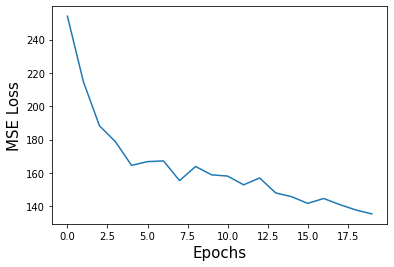

In [66]:
plt.plot(losslist)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("MSE Loss", fontsize=15)
plt.show()

## Test model

In [67]:
predict_outs = model.forward(X_test_tensor)
Y_test = Y_test_tensor
Y_test = torch.flatten(Y_test)
Y_test = torch.as_tensor(Y_test, dtype=torch.int32)
print(Y_test)

tensor([1, 0, 0,  ..., 2, 2, 0], dtype=torch.int32)


In [68]:
y_pred_test = torch.argmax(predict_outs,dim=1)
print(y_pred_test)

tensor([2, 2, 0,  ..., 2, 2, 0])


## Confusion matrix

In [69]:
print("Accuracy score: {}".format(round(accuracy_score(Y_test ,y_pred_test),2)))
print(classification_report(Y_test,y_pred_test))

Accuracy score: 0.71
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1065
           1       0.56      0.36      0.44       296
           2       0.66      0.76      0.71       921

    accuracy                           0.71      2282
   macro avg       0.67      0.62      0.64      2282
weighted avg       0.70      0.71      0.70      2282



In [70]:
C = np.array(confusion_matrix(Y_test ,y_pred_test))

confmtrx = pd.DataFrame(C, index=['neutral, true','anti-vax, true','pro-vax, true'],
columns=['neutral, predicted','anti-vax, predicted','pro-vax, predicted'])

confmtrx.loc['sum'] = confmtrx.sum()
confmtrx['sum'] = confmtrx.sum(axis=1)
confmtrx

,"neutral, predicted","anti-vax, predicted","pro-vax, predicted",sum
"neutral, true",807,40,218,1065
"anti-vax, true",55,106,135,296
"pro-vax, true",181,44,696,921
sum,1043,190,1049,2282


## ROC Curve scores

In [71]:
import sklearn.metrics as metrics

probs = model.forward(X_test_tensor)

# keep probabilities for the positive outcome only
ns_probs = [[0,0,0] for _ in range(len(Y_test))]

print(Y_test_tensor)
Y_testb = one_hot_encoder(Y_test_tensor)
Y_testb = torch.as_tensor(Y_testb, dtype=torch.float32)

print(Y_testb)
probs = torch.argmax(probs,dim=1)
probs = one_hot_encoder(probs)
probs = torch.as_tensor(probs, dtype=torch.float32)
print(probs)

ns_auc = roc_auc_score(Y_testb, ns_probs, multi_class="ovr")
lr_auc = roc_auc_score(Y_testb, probs, multi_class="ovr")

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

tensor([[1.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [0.]])
tensor([[0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
tensor([[0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]])
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.729


## ROC Curve 

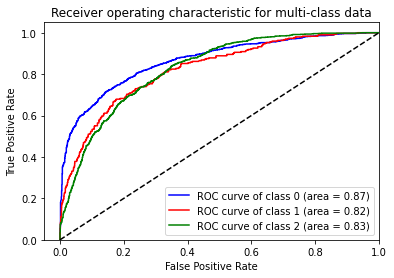

In [72]:
#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

predict_outs = model.forward(X_test_tensor)
predict_outs = predict_outs.detach().numpy()

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(Y_testb[:, i],predict_outs[:, i] )
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()